In [ ]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading data
data = np.loadtxt('/content/drive/MyDrive/takens_1.txt')
data_x = data[:, 0]
data_y = data[:, 1]

print(data[:10])

[[ 2.16837096 -0.54631259]
 [ 2.17981061 -0.53247518]
 [ 2.19002807 -0.51894034]
 [ 2.1986378  -0.50619753]
 [ 2.20562343 -0.49435527]
 [ 2.21139174 -0.48268592]
 [ 2.21560171 -0.471797  ]
 [ 2.21833783 -0.46155165]
 [ 2.21961415 -0.45195839]
 [ 2.21942103 -0.44268148]]


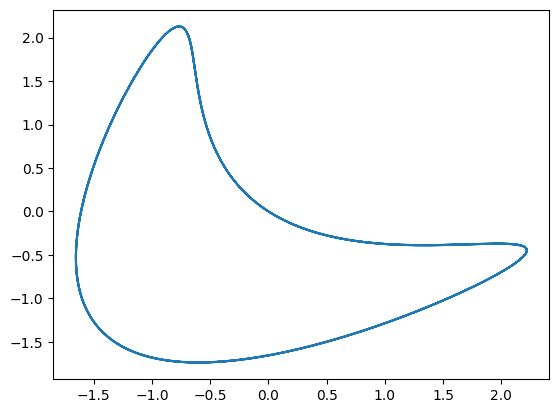

In [ ]:
# Plotting the first and second coordinates
plt.plot(data_x, data_y)


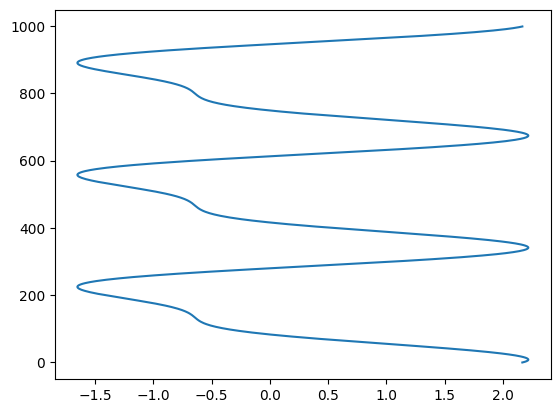

In [ ]:
# plotting first coordinates with time with no delay
time = [i for i in range(data.shape[0])]
plt.plot(data_x, time);

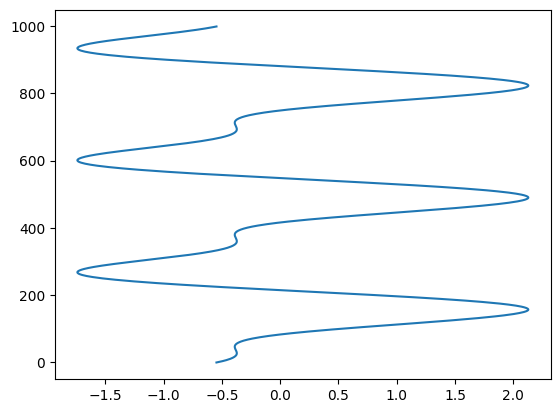

In [ ]:
# plotting second coordinates with time with no delay

time = [i for i in range(data.shape[0])]
plt.plot(data_y, time);

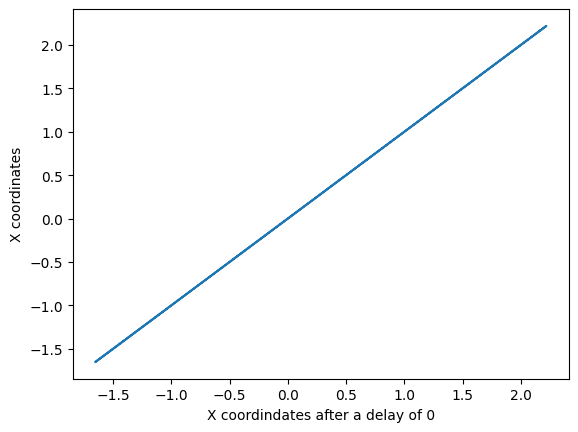

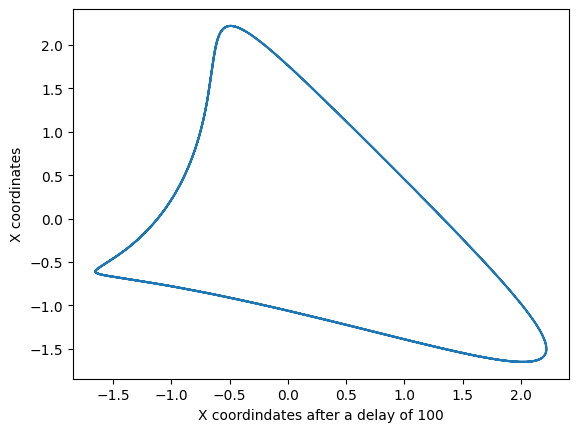

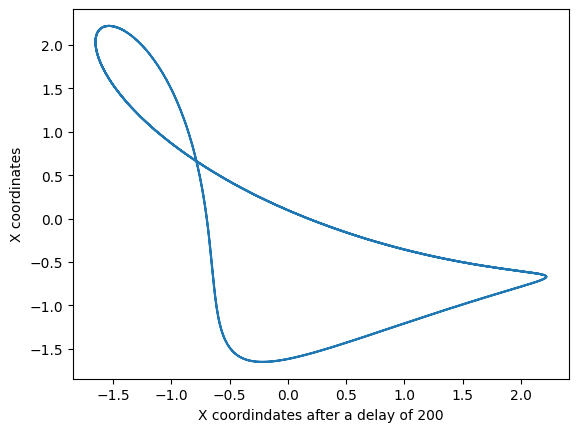

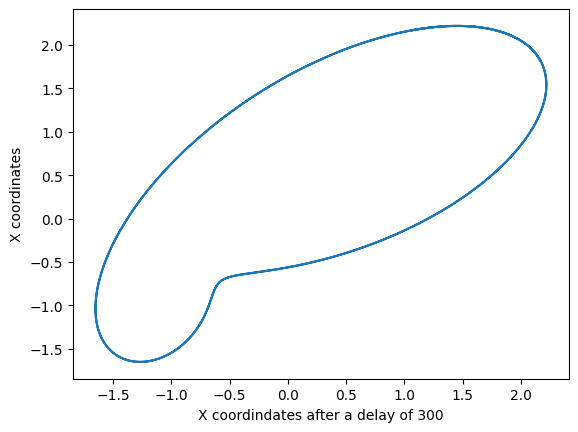

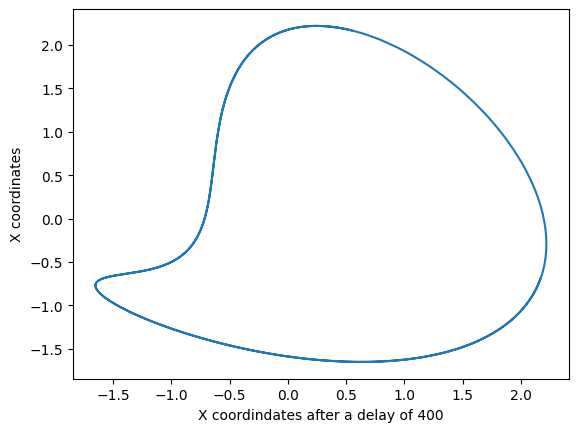

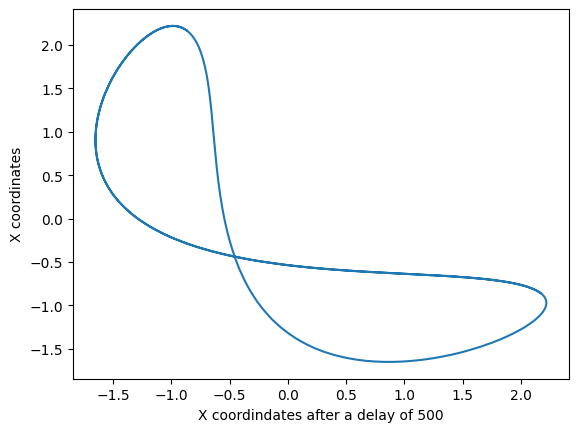

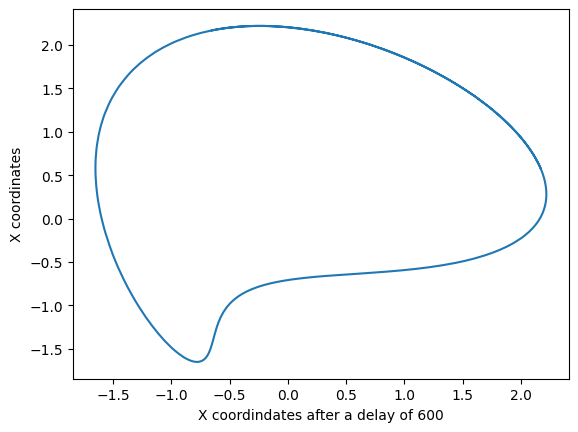

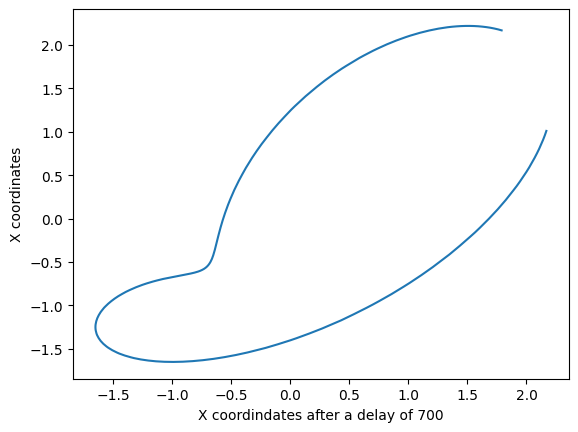

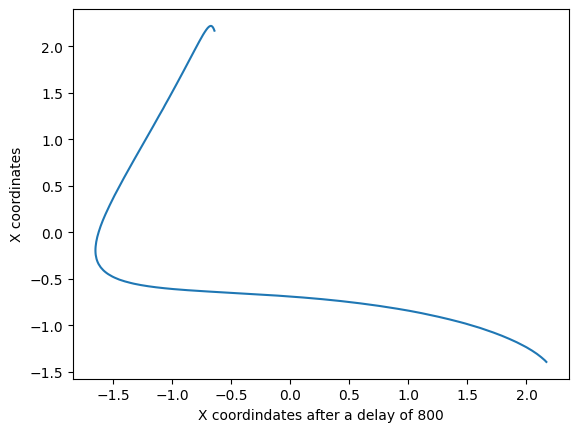

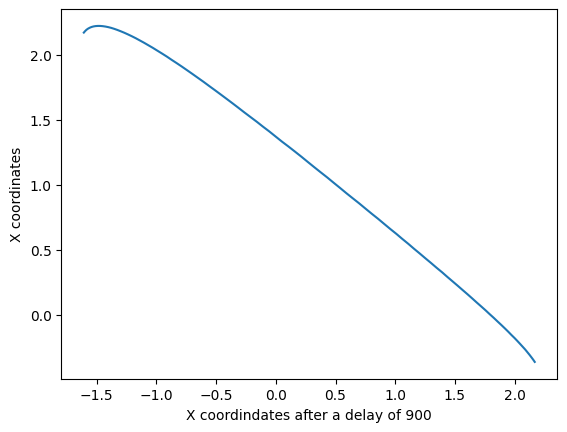

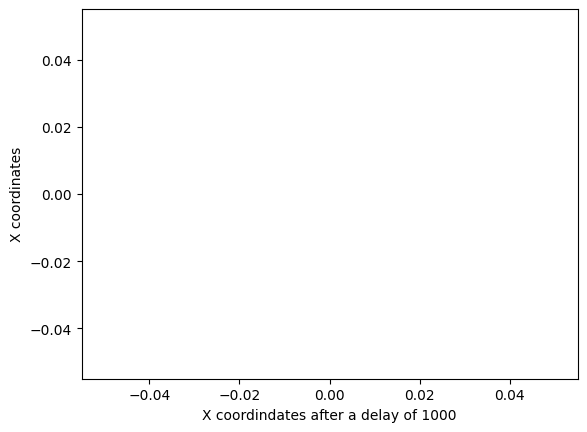

In [ ]:
# Plot the first corrdinates with a time delay and an interval of 100
interval = 100
time = len(data_x)
for i in range(math.floor(data.shape[0]/interval)+1):
    delta_t = interval * i
    plt.plot(data_x[delta_t:], data_x[:time - delta_t])
    plt.xlabel(f"X coordindates after a delay of {delta_t}")
    plt.ylabel("X coordinates")
    plt.show()

In [ ]:
# Using code from Ex4
# Define the Lorenz system

def lorenz(t, xyz, sigma=10.0, beta=8.0/3.0, rho=28.0):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]


# Plot the trajectory in 3D
def plot_trajectory(sol):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(sol.y[0], sol.y[1], sol.y[2])
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('Lorenz System Trajectory')
    ax.legend()
    plt.show()


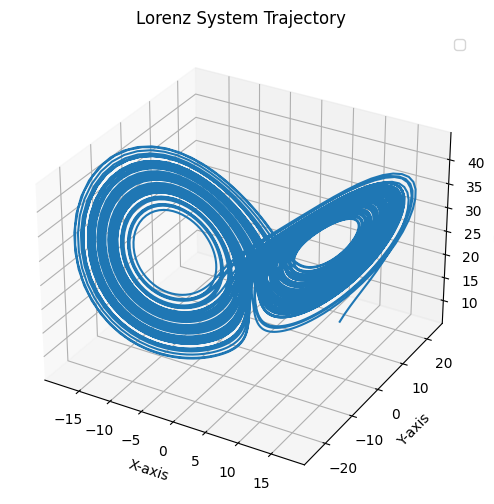

In [ ]:
from scipy.integrate import solve_ivp

# Plot trajectories for given initial conditions and parameters
def plot_lorenz_trajectories(x0, sigma=10.0, beta=8.0/3.0, rho=28.0, t_span=(0, 1000)):
    # Compute the trajectory for the given initial conditions and parameters
    sol = solve_ivp(lorenz, t_span, x0, args=(sigma, beta, rho), t_eval=np.arange(0.0, 100, 0.01))

    # Plot the trajectories
    plot_trajectory(sol)
    return sol

# Initial conditions
x0 = [10, 10, 10]

# Plot trajectories for ρ = 28
sol = plot_lorenz_trajectories(x0, rho=28)


## Measure X coordinate of Lorenz attractor

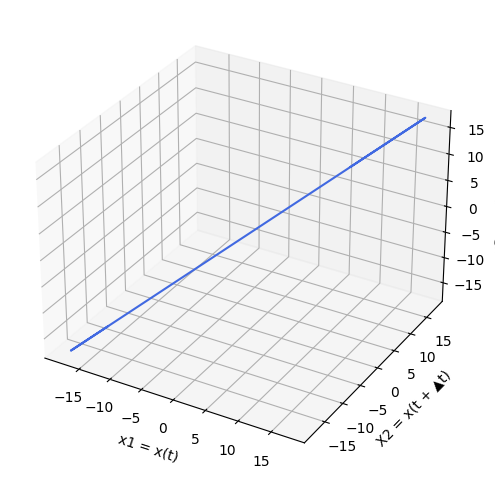

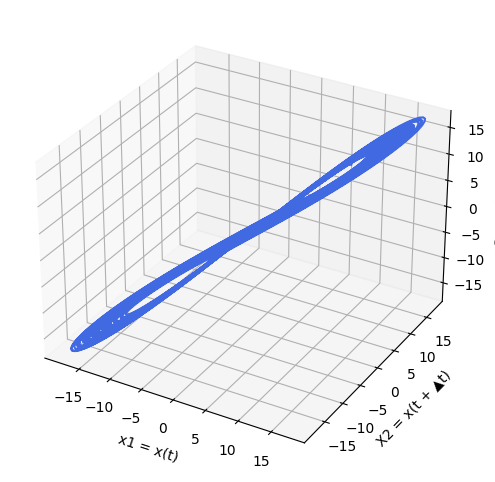

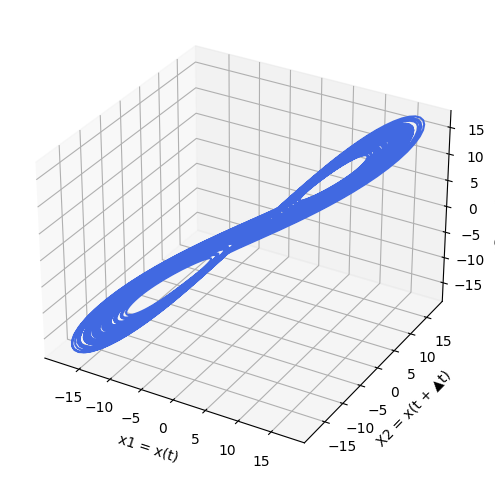

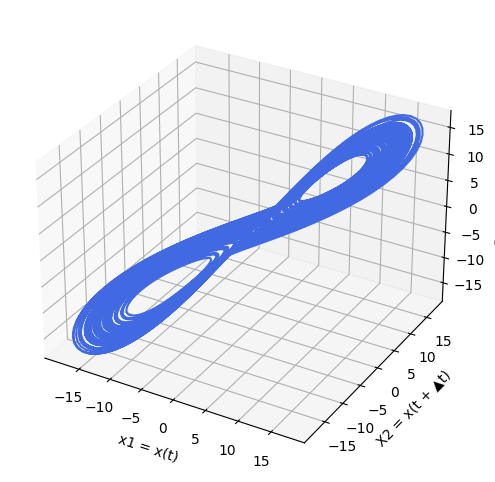

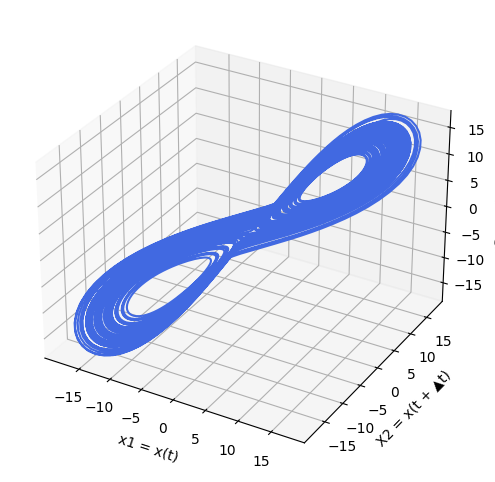

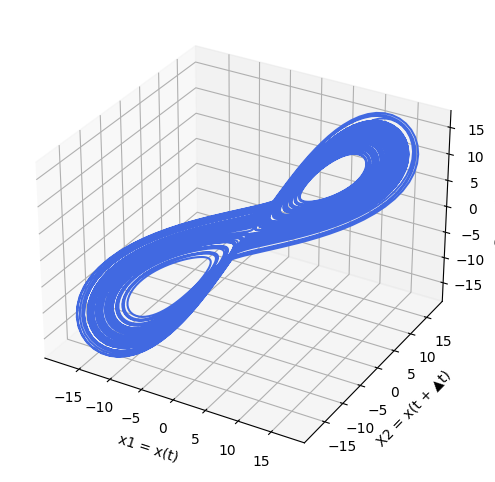

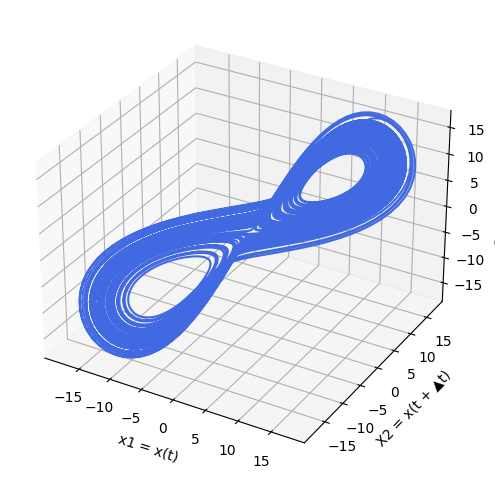

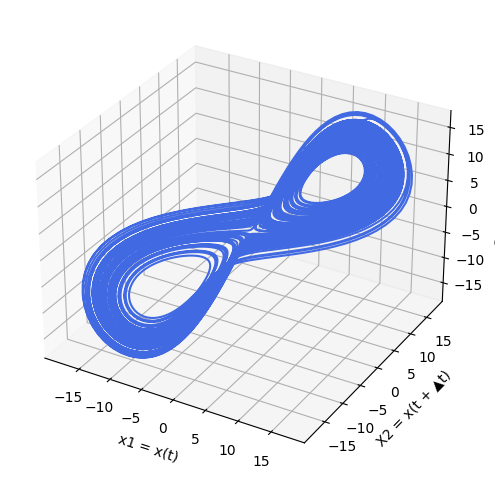

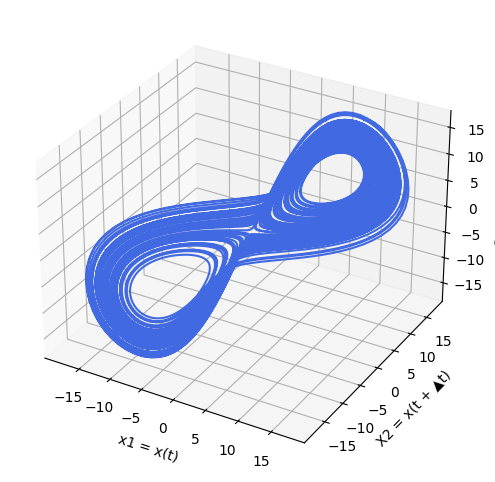

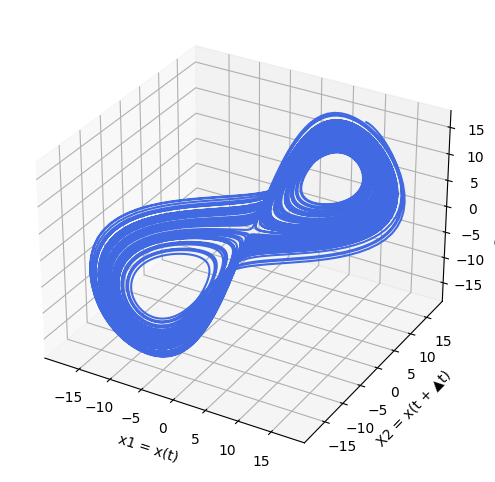

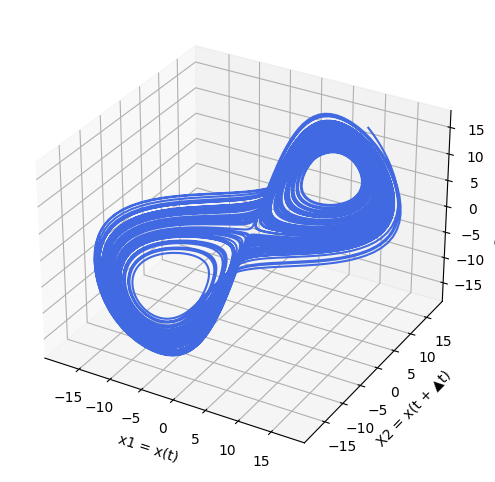

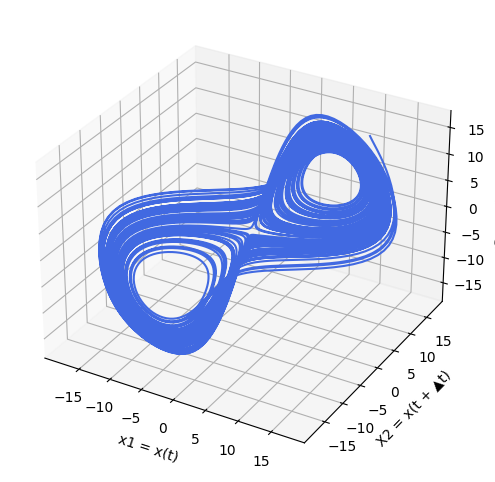

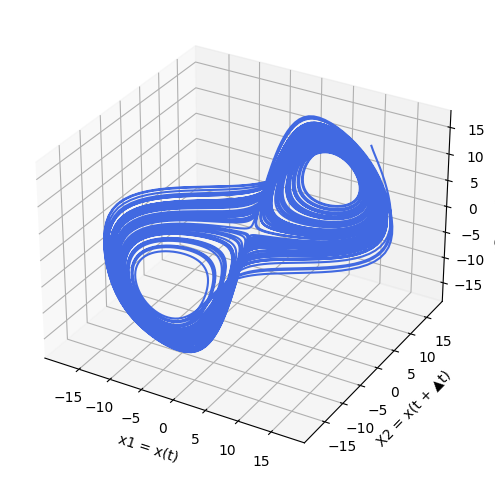

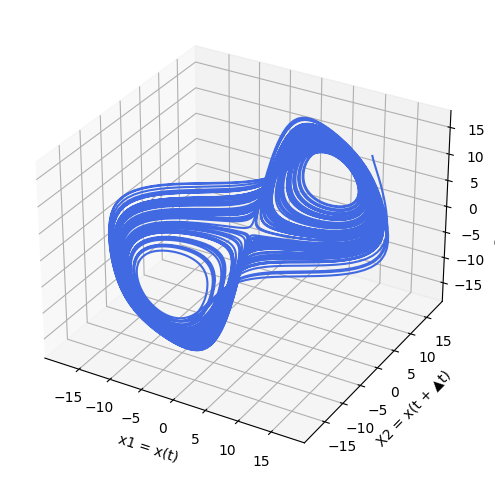

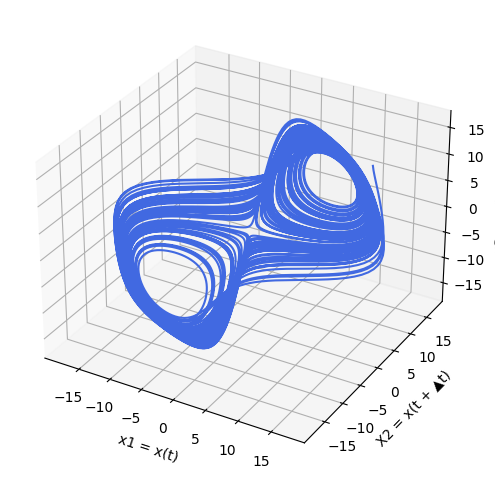

In [ ]:
# Here we use i as the ▲t value
for i in range(0, 15):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(sol.y.T[:10000 - i*2, 0], sol.y.T[i:10000 - i, 0], sol.y.T[i*2:, 0], color='#4169E1')
    ax.set_xlabel('x1 = x(t)')
    ax.set_ylabel('X2 = x(t + ▲t)')
    ax.set_zlabel('x3 = x(t + 2▲t)')
    # ax.set_title('Lorenz System Trajectory')
    # ax.legend()
    plt.show()

## Measure Z coordinate of Lorenz attractor

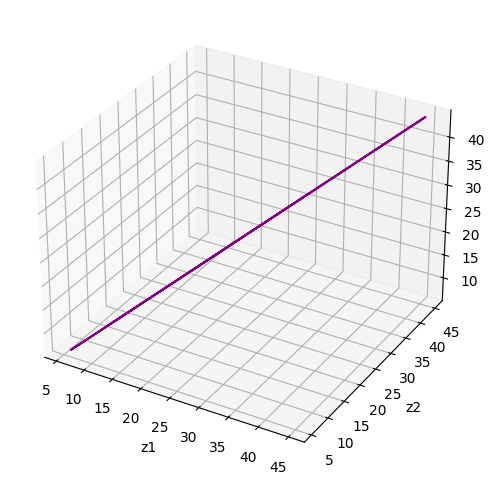

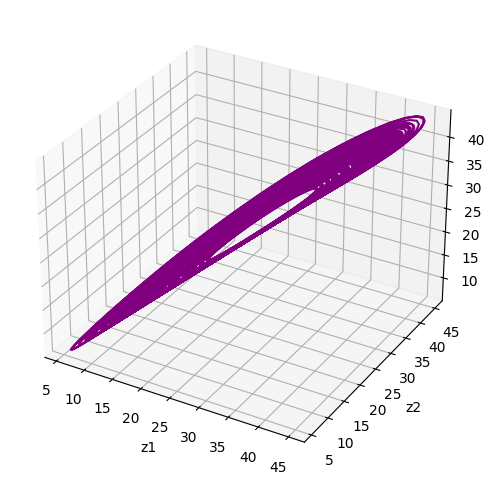

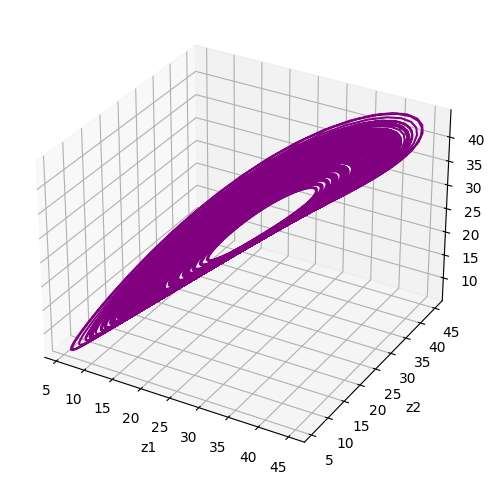

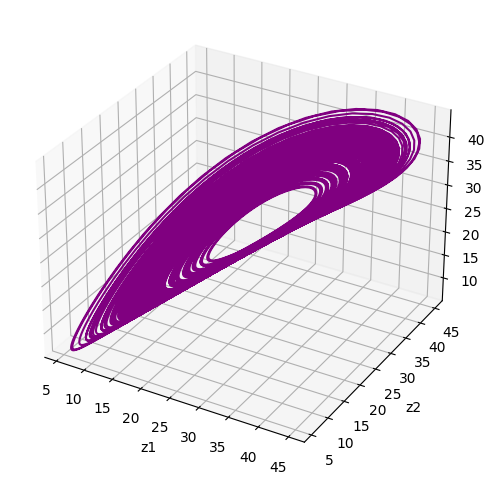

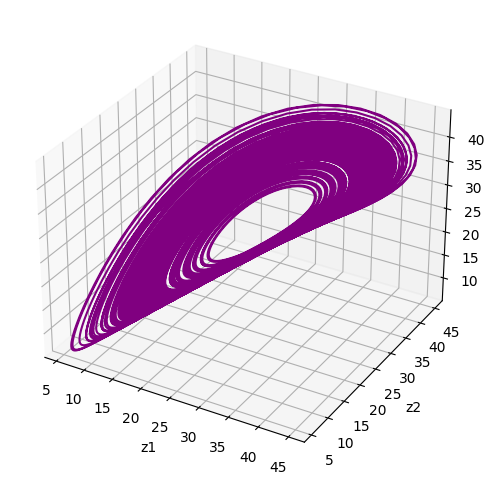

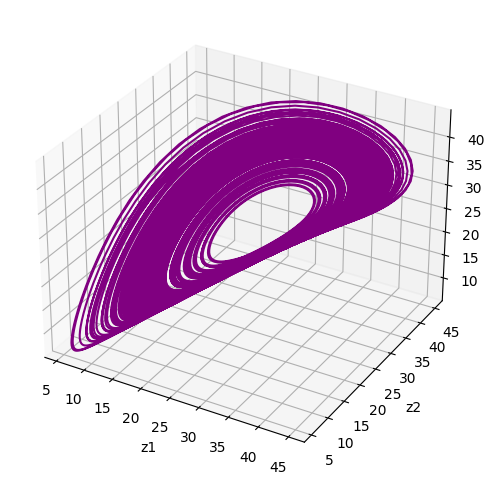

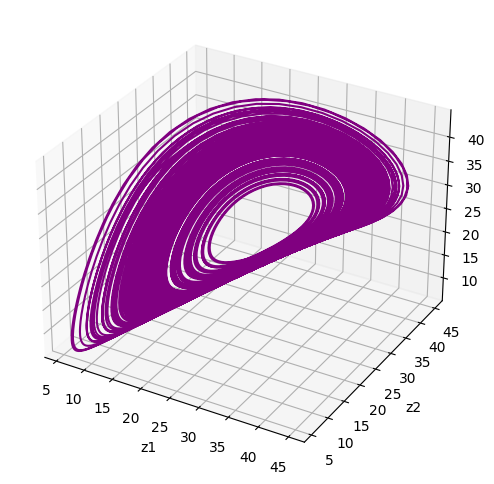

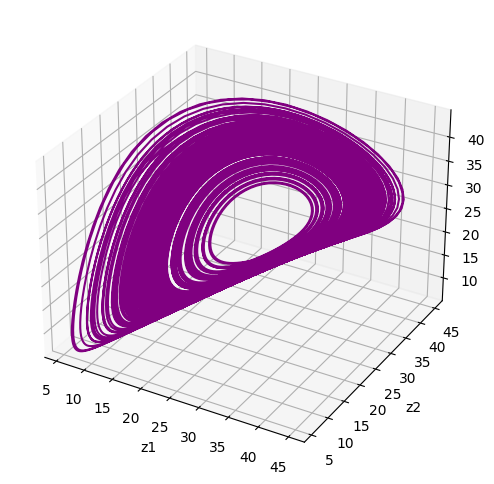

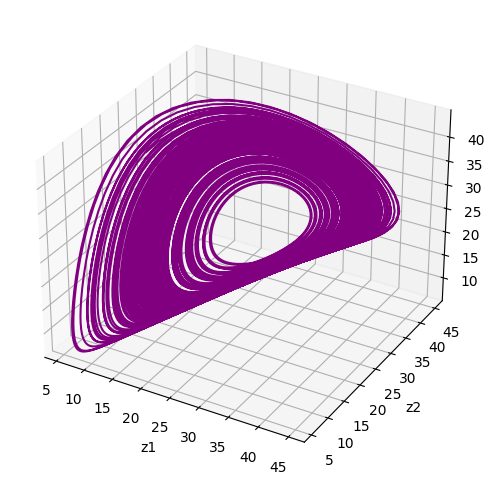

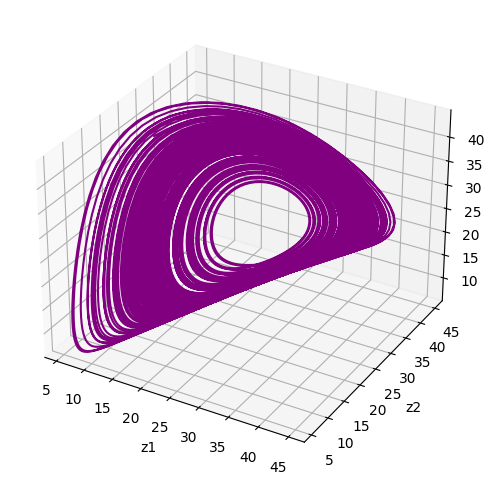

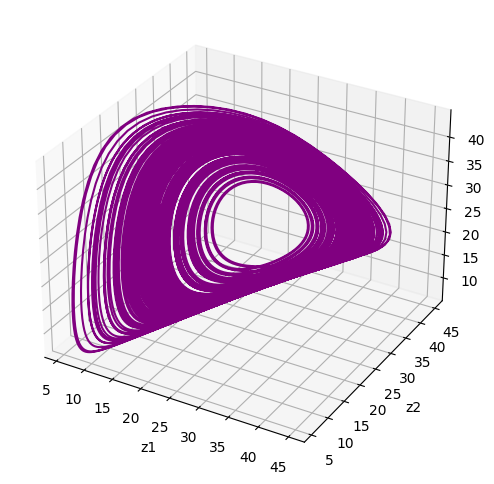

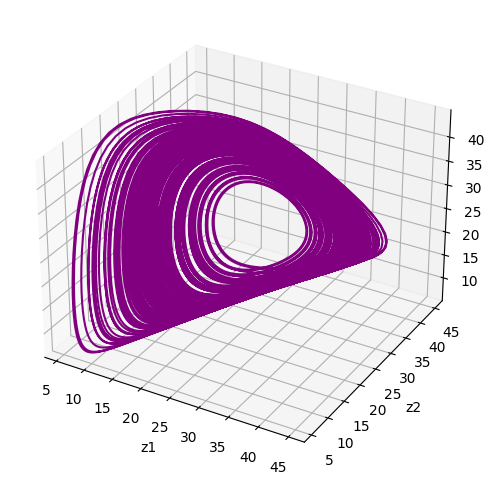

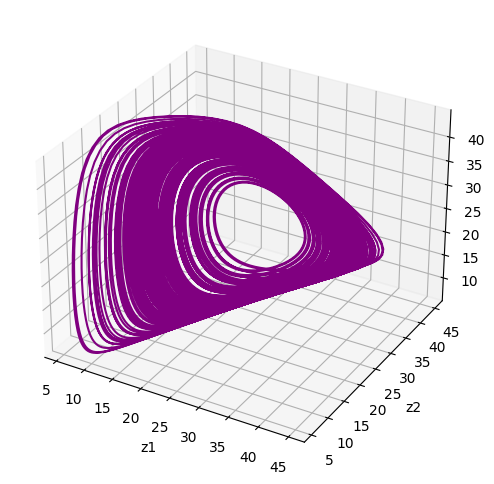

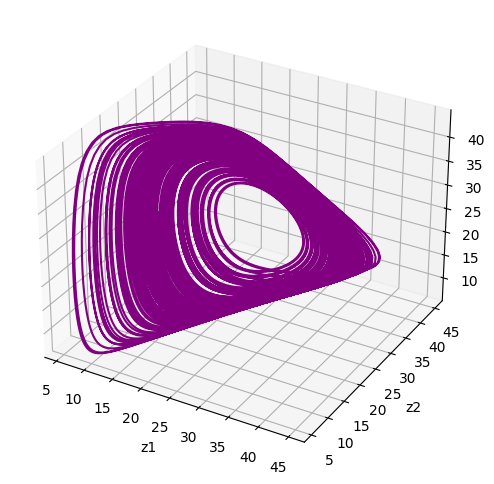

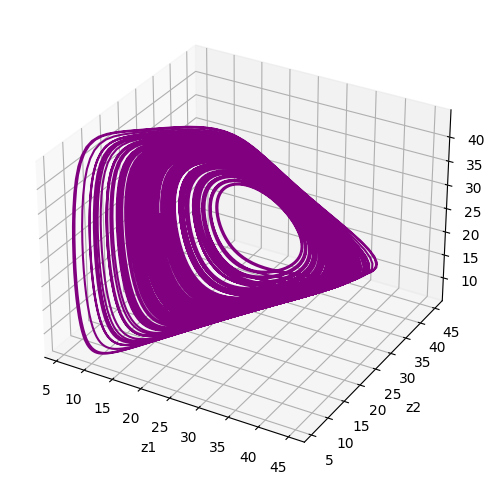

In [ ]:
# Here we use i as the ▲t value
for i in range(0, 15):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(sol.y.T[:10000 - i*2, 2], sol.y.T[i:10000 - i, 2], sol.y.T[i*2:, 2], color='purple')
    ax.set_xlabel('z1')
    ax.set_ylabel('z2')
    ax.set_zlabel('z3')
    # ax.set_title('Lorenz System Trajectory')
    # ax.legend()
    plt.show()